# Project(final) : Course Ratings & Marketing to Frequent Fliers

### 제출일 : 2023.06.12

# 1. Course Ratings

In [20]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import dmba

%matplotlib inline

# Load the data from 'courserating.csv' into courserating_df
courserating_df = dmba.load_data('courserating.csv')

# Rename the 'Unnamed: 0' column to 'subject'
courserating_df = courserating_df.rename(columns={'Unnamed: 0': 'subject'})

# Print the column names to verify the change
print(courserating_df.columns)

# Set the index of courserating_df to the 'subject' column
courserating_df.set_index('subject', inplace=True)

# Convert integer data to float in courserating_df to avoid a warning when applying the scale function
courserating_df = courserating_df.apply(lambda x: x.astype('float64'))

# Print the head of courserating_df
print(courserating_df.head())

Index(['subject', 'SQL', 'Spatial', 'PA1', 'DM in R', 'Python', 'Forecast',
       'R Prog', 'Hadoop', 'Regression'],
      dtype='object')
         SQL  Spatial  PA1  DM in R  Python  Forecast  R Prog  Hadoop  \
subject                                                                 
LN       4.0      NaN  NaN      NaN     3.0       2.0     4.0     NaN   
MH       3.0      4.0  NaN      NaN     4.0       NaN     NaN     NaN   
JH       2.0      2.0  NaN      NaN     NaN       NaN     NaN     NaN   
EN       4.0      NaN  NaN      4.0     NaN       NaN     4.0     NaN   
DU       4.0      4.0  NaN      NaN     NaN       NaN     NaN     NaN   

         Regression  
subject              
LN              2.0  
MH              NaN  
JH              NaN  
EN              3.0  
DU              NaN  


Compute Euclidean distance matrix (to compute other metrics, change the name of `metric` argument)

In [21]:
# Handle missing values in courserating_df (데이터 값이 없는 경우 0을 입력하도록 처리)
courserating_df.fillna(0, inplace=True)  # Replace missing values with 0 or use an appropriate method

# Calculate pairwise distances
d = pairwise.pairwise_distances(courserating_df, metric='euclidean')

# Create a DataFrame with pairwise distances
distance_df = pd.DataFrame(d, columns=courserating_df.index, index=courserating_df.index)
print(distance_df.head(5))

subject        LN        MH        JH        EN        DU        FL        GL  \
subject                                                                         
LN       0.000000  6.480741  6.403124  5.477226  7.000000  8.062258  8.062258   
MH       6.480741  0.000000  4.582576  8.602325  4.123106  5.000000  5.000000   
JH       6.403124  4.582576  0.000000  7.000000  2.828427  2.828427  2.828427   
EN       5.477226  8.602325  7.000000  0.000000  7.549834  8.544004  8.544004   
DU       7.000000  4.123106  2.828427  7.549834  0.000000  4.000000  4.000000   

subject        AH        SA        RW        BA        MG        AF        KG  \
subject                                                                         
LN       7.615773  8.062258  8.306624  8.062258  8.062258  8.062258  7.615773   
MH       5.099020  7.549834  7.810250  7.549834  8.544004  7.549834  7.071068   
JH       2.236068  4.898979  5.291503  4.898979  6.324555  4.898979  4.123106   
EN       8.124038  8.544004

## Table 15.4
Here are two ways to normalize the input variables. Pandas calculates by default the sample standard deviation, whereas scikit-learn uses the population standard deviation. The normalized data from the two methods will therefore differ slightly. We will use the Pandas approach as it is equivalent to the R implementation of scale.

In [30]:
# scikit-learn uses population standard deviation
courserating_df_norm = courserating_df.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
courserating_df_norm = (courserating_df - courserating_df.mean())/courserating_df.std()

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(courserating_df_norm[['SQL', 'Spatial']], 
                                     metric='euclidean')
pd.DataFrame(d_norm, columns=courserating_df.index, index=courserating_df.index).head(5)

subject,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
subject,,,,,,,,,,,,,,,
LN,0.000000,2.236068,1.533930,0.000000,2.169305,3.067860,3.067860,2.711631,2.169305,2.169305,2.169305,2.169305,2.169305,2.169305,0.000000
MH,2.236068,0.000000,1.212678,2.236068,0.542326,1.626978,1.626978,1.714986,2.711631,2.711631,2.711631,2.711631,2.711631,2.711631,2.236068
JH,1.533930,1.212678,0.000000,1.533930,1.533930,1.533930,1.533930,1.212678,1.533930,1.533930,1.533930,1.533930,1.533930,1.533930,1.533930
EN,0.000000,2.236068,1.533930,0.000000,2.169305,3.067860,3.067860,2.711631,2.169305,2.169305,2.169305,2.169305,2.169305,2.169305,0.000000
DU,2.169305,0.542326,1.533930,2.169305,0.000000,2.169305,2.169305,2.236068,3.067860,3.067860,3.067860,3.067860,3.067860,3.067860,2.169305


## Figure 15.3


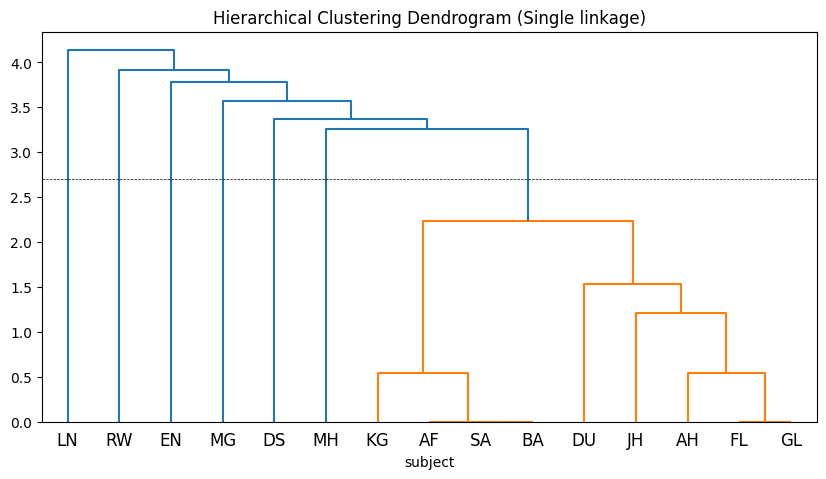

In [35]:
Z = linkage(courserating_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('subject')
dendrogram(Z, labels=courserating_df_norm.index, color_threshold=2.7)
plt.axhline(y=2.7, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

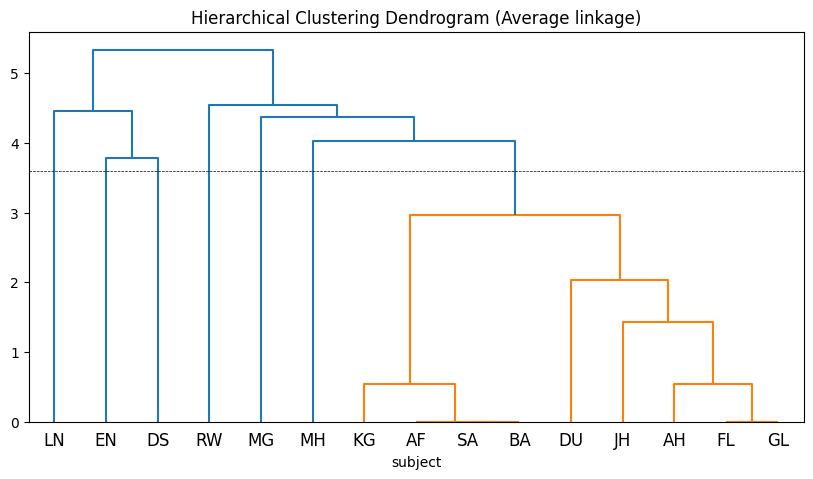

In [36]:
Z = linkage(courserating_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('subject')
dendrogram(Z, labels=courserating_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

## Table 15.6

In [38]:
memb = fcluster(linkage(courserating_df_norm, 'single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=courserating_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  MH, JH, DU, FL, GL, AH, SA, BA, AF, KG
2 :  DS
3 :  MG
4 :  EN
5 :  RW
6 :  LN


In [39]:
memb = fcluster(linkage(courserating_df_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=courserating_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  EN, DS
2 :  LN
3 :  JH, DU, FL, GL, AH, SA, BA, AF, KG
4 :  MH
5 :  MG
6 :  RW


## Figure 15.4

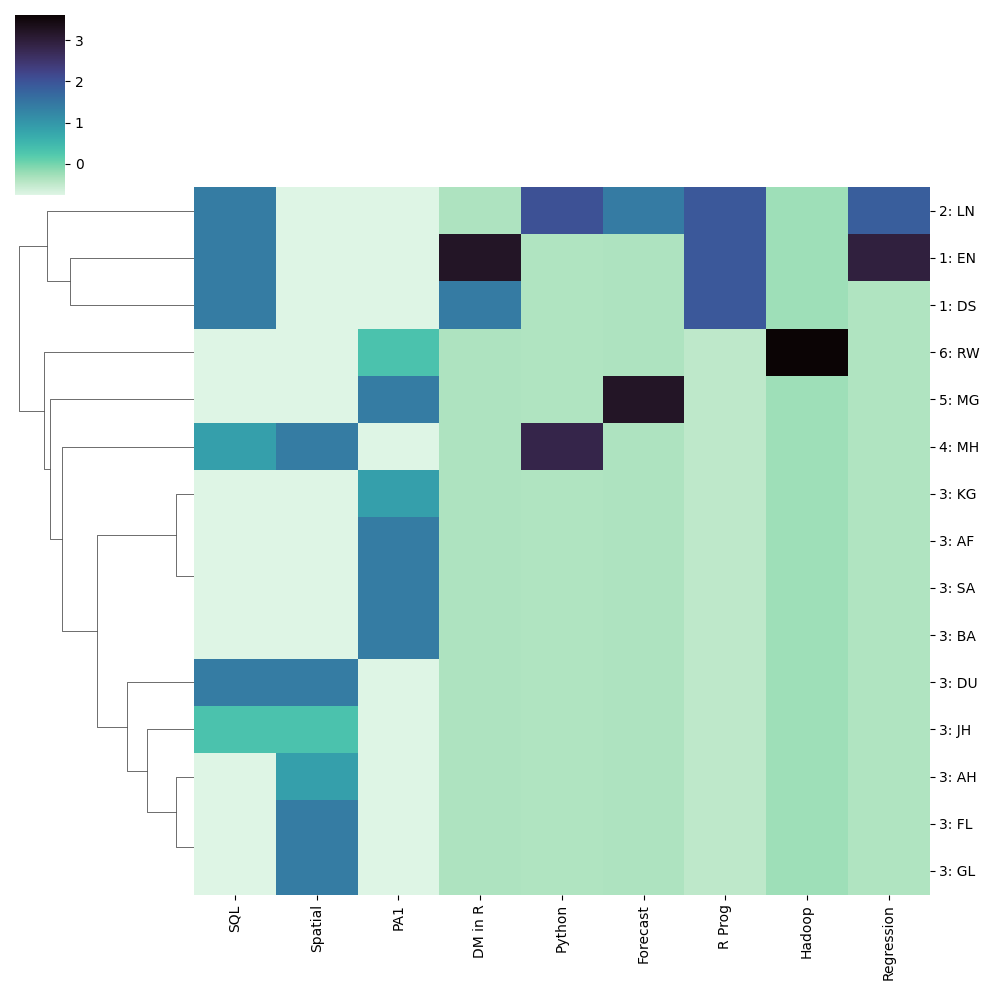

In [40]:
courserating_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, courserating_df_norm.index)]
sns.clustermap(courserating_df_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

## Figure 15.9

In [82]:
import numpy as np
from sklearn.cluster import KMeans

# Load and preprocess data
courserating_df = dmba.load_data('courserating.csv')
# Rename the 'Unnamed: 0' column to 'subject'
courserating_df = courserating_df.rename(columns={'Unnamed: 0': 'subject'})

courserating_df.set_index('subject', inplace=True)
courserating_df = courserating_df.apply(lambda x: x.astype('float64'))

courserating_df.fillna(0, inplace=True)

# Normalized distance
courserating_df_norm = courserating_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(courserating_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=courserating_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  JH, DU, FL, GL, AH
1 :  EN, DS
2 :  SA, BA, MG, AF, KG
3 :  MH
4 :  LN
5 :  RW


## Table 15.10

In [83]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=courserating_df_norm.columns)
pd.set_option('display.precision', 3)
print(centroids)
pd.set_option('display.precision', 6)

     SQL  Spatial    PA1  DM in R  Python  Forecast  R Prog  Hadoop  \
0 -0.112    1.123 -0.786   -0.369  -0.388    -0.369    -0.5  -0.267   
1  1.460   -0.786 -0.786    2.400  -0.388    -0.369     2.0  -0.267   
2 -0.786   -0.786  1.347   -0.369  -0.388     0.369    -0.5  -0.267   
3  0.898    1.460 -0.786   -0.369   2.935    -0.369    -0.5  -0.267   
4  1.460   -0.786 -0.786   -0.369   2.105     1.477     2.0  -0.267   
5 -0.786   -0.786  0.337   -0.369  -0.388    -0.369    -0.5   3.742   

   Regression  
0      -0.383  
1       1.342  
2      -0.383  
3      -0.383  
4       1.917  
5      -0.383  


In [84]:
withinClusterSS = [0] * 6
clusterCount = [0] * 6
for cluster, distance in zip(kmeans.labels_, kmeans.transform(courserating_df_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (5 members):  5.04 within cluster
Cluster 1 (2 members):  7.66 within cluster
Cluster 2 (5 members): 11.16 within cluster
Cluster 3 (1 members):  0.00 within cluster
Cluster 4 (1 members):  0.00 within cluster
Cluster 5 (1 members):  0.00 within cluster


In [85]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(courserating_df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=courserating_df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (5 members): 5.04 within cluster 
Cluster 1 (2 members): 7.66 within cluster 
Cluster 2 (5 members): 11.16 within cluster 
Cluster 3 (1 members): 0.00 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (1 members): 0.00 within cluster 


## Figure 15.5

,SQL,Spatial,PA1,DM in R,Python,Forecast,R Prog,Hadoop,Regression,cluster
0,-0.112272,1.122722,-0.785905,-0.369274,-0.387694,-0.369274,-0.5,-0.267261,-0.383482,Cluster 0
1,1.459538,-0.785905,-0.785905,2.400284,-0.387694,-0.369274,2.0,-0.267261,1.342189,Cluster 1
2,-0.785905,-0.785905,1.347266,-0.369274,-0.387694,0.369274,-0.5,-0.267261,-0.383482,Cluster 2
3,0.898177,1.459538,-0.785905,-0.369274,2.935399,-0.369274,-0.5,-0.267261,-0.383482,Cluster 3
4,1.459538,-0.785905,-0.785905,-0.369274,2.104625,1.477098,2.0,-0.267261,1.917412,Cluster 4
5,-0.785905,-0.785905,0.336817,-0.369274,-0.387694,-0.369274,-0.5,3.741657,-0.383482,Cluster 5


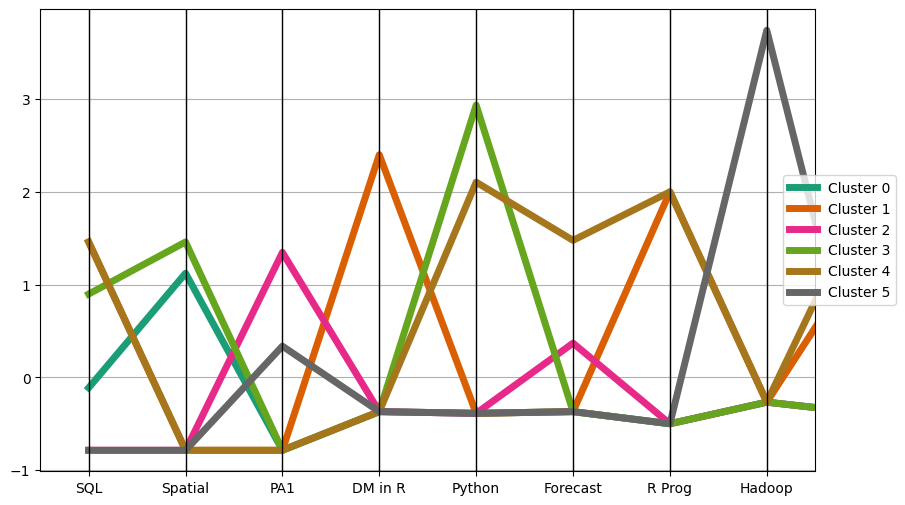

In [86]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [87]:
courserating_df_norm.groupby(kmeans.labels_).mean()

,SQL,Spatial,PA1,DM in R,Python,Forecast,R Prog,Hadoop,Regression
0,-0.112272,1.122722,-0.785905,-0.369274,-0.387694,-0.369274,-0.5,-0.267261,-0.383482
1,1.459538,-0.785905,-0.785905,2.400284,-0.387694,-0.369274,2.0,-0.267261,1.342189
2,-0.785905,-0.785905,1.347266,-0.369274,-0.387694,0.369274,-0.5,-0.267261,-0.383482
3,0.898177,1.459538,-0.785905,-0.369274,2.935399,-0.369274,-0.5,-0.267261,-0.383482
4,1.459538,-0.785905,-0.785905,-0.369274,2.104625,1.477098,2.0,-0.267261,1.917412
5,-0.785905,-0.785905,0.336817,-0.369274,-0.387694,-0.369274,-0.5,3.741657,-0.383482


## Table 15.11

In [88]:
# 각 집합별 거리계산(중심선 0에서 수치가 낮을 수록 가까운 것으로 파악)

print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  4.797066  3.031916  3.489613  5.222864  4.629100
1  4.797066  0.000000  5.199643  5.770484  4.197867  6.266765
2  3.031916  5.199643  0.000000  4.900711  5.345604  4.199749
3  3.489613  5.770484  4.900711  0.000000  4.582634  6.021049
4  5.222864  4.197867  5.345604  4.582634  0.000000  6.598395
5  4.629100  6.266765  4.199749  6.021049  6.598395  0.000000


In [95]:
# 0에 가까울 수록 좋음(1이면 분석의 의미가 없음)

pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    21.170559
1    26.231824
2    22.677623
3    24.764491
4    25.947364
5    27.715058
dtype: float64

## Figure 15.6

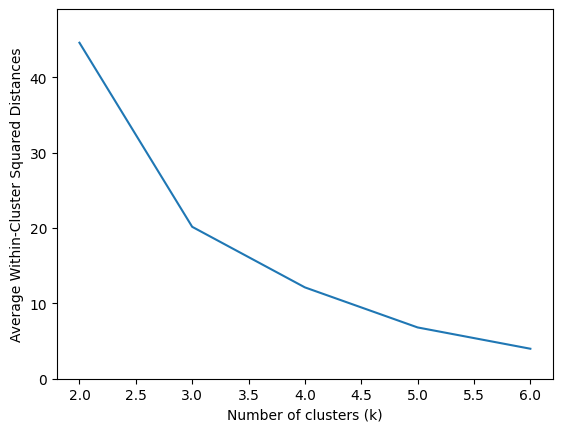

In [94]:

inertia = []
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(courserating_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.get_legend().remove()  # Updated this line
plt.show()
